## Import Statements


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

### Reading .csv


In [3]:
df_data = pd.read_csv("nobel_prize_data.csv")

### Formatting NoteBook


In [4]:
pd.options.display.float_format = "{:,.2f}".format

##### Shape of DataFrame


In [5]:
df_data.shape

(962, 16)

##### Column Names


In [6]:
df_data.columns

Index(['year', 'category', 'prize', 'motivation', 'prize_share',
       'laureate_type', 'full_name', 'birth_date', 'birth_city',
       'birth_country', 'birth_country_current', 'sex', 'organization_name',
       'organization_city', 'organization_country', 'ISO'],
      dtype='object')

##### First Nobel Prize


In [7]:
display(df_data.nsmallest(n=1, columns="year"))

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Netherlands,Male,Berlin University,Berlin,Germany,NLD


##### Last Nobel Prize


In [8]:
display(df_data.nlargest(n=1, columns="year"))

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO
950,2020,Chemistry,The Nobel Prize in Chemistry 2020,“for the development of a method for genome ed...,1/2,Individual,Emmanuelle Charpentier,1968-12-11,Juvisy-sur-Orge,France,France,Female,Max-Planck-Institut,Berlin,Germany,FRA


##### Convert the `birth_date` column to Pandas `Datetime` objects


In [9]:
df_data["birth_date"] = pd.to_datetime(df_data["birth_date"])

##### Add a Column called `share_pct` which has the laureates' share as a percentage in the form of a floating-point number.


In [10]:
df_data.head()

seperated_value = df_data["prize_share"].str.split("/", expand=True)
num = pd.to_numeric(seperated_value[0])
d_num = pd.to_numeric(seperated_value[1])
result = num / d_num

df_data["share_pct"] = result

### Male & Female Total Share


In [11]:
gender_shares = df_data["sex"].value_counts()


# Setting Coordinates:
DF = gender_shares
LABEL = gender_shares.index
VALUES = gender_shares.values

pie = px.pie(
    data_frame=DF,
    title="Male VS Female Nobel Share",
    labels=LABEL,
    values=VALUES,
    names=LABEL,
    hole=0.2,
)

pie.update_traces(
    textposition="inside",
    textinfo="label+percent",
    marker=dict(colors=["dodgerblue", "crimson"]),
)

pie.show()

#### First 3 Female Laurates


In [12]:
df_data[df_data["sex"] == "Female"].sort_values(by="year", ascending=True)[:3]

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct
18,1903,Physics,The Nobel Prize in Physics 1903,"""in recognition of the extraordinary services ...",1/4,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,Russian Empire (Poland),Poland,Female,NaN,NaN,NaN,POL,0.25
29,1905,Peace,The Nobel Peace Prize 1905,NaN,1/1,Individual,"Baroness Bertha Sophie Felicita von Suttner, n...",1843-06-09,Prague,Austrian Empire (Czech Republic),Czech Republic,Female,NaN,NaN,NaN,CZE,1.00
51,1909,Literature,The Nobel Prize in Literature 1909,"""in appreciation of the lofty idealism, vivid ...",1/1,Individual,Selma Ottilia Lovisa Lagerlöf,1858-11-20,Mårbacka,Sweden,Sweden,Female,NaN,NaN,NaN,SWE,1.00


### Individual who won twice or more times


In [13]:
is_winner = df_data.duplicated(subset="full_name", keep=False)

multiple_winner = df_data[is_winner]

col_subset = ["year", "category", "full_name", "birth_country_current"]

multiple_winner[col_subset].head()

,year,category,full_name,birth_country_current
18,1903,Physics,"Marie Curie, née Sklodowska",Poland
62,1911,Chemistry,"Marie Curie, née Sklodowska",Poland
89,1917,Peace,Comité international de la Croix Rouge (Intern...,NaN
215,1944,Peace,Comité international de la Croix Rouge (Intern...,NaN
278,1954,Chemistry,Linus Carl Pauling,United States of America


#### Plotly bar chart with the number of prizes awarded by Category


In [14]:
categories = df_data["category"].value_counts()

# Setting Coordinates:
DF = categories
XCOR = categories.index
YCOR = categories.values

# Setting Labels:
TITLE = "Nobels Per Category"
XLABEL = "Categories"
YLABEL = "No. Prize"

bar = px.bar(
    data_frame=DF,
    x=XCOR,
    y=YCOR,
    color=XCOR,
)

bar.update_layout(
    xaxis_title=XLABEL,
    yaxis_title=YLABEL,
    legend_title_text="Categories",
)

bar.show()

#### The Economics Prize


In [15]:
df_data[df_data["category"] == "Economics"].sort_values(by="year", ascending=True)[:3]

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct
393,1969,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for having developed and applied dynamic mode...",1/2,Individual,Jan Tinbergen,1903-04-12,the Hague,Netherlands,Netherlands,Male,The Netherlands School of Economics,Rotterdam,Netherlands,NLD,0.50
394,1969,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for having developed and applied dynamic mode...",1/2,Individual,Ragnar Frisch,1895-03-03,Oslo,Norway,Norway,Male,University of Oslo,Oslo,Norway,NOR,0.50
402,1970,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for the scientific work through which he has ...",1/1,Individual,Paul A. Samuelson,1915-05-15,"Gary, IN",United States of America,United States of America,Male,Massachusetts Institute of Technology (MIT),"Cambridge, MA",United States of America,USA,1.00


#### Male and Female Winners by Category


In [16]:
category_n_genders = (
    df_data.groupby(["category", "sex"], as_index=False)
    .agg({"prize": pd.Series.count})
    .sort_values(by="prize", ascending=False)
)


category_n_genders.head()

# Setting Coordinates:
DF = category_n_genders
XCOR = "category"
YCOR = "prize"

# Setting Labels:
TITLE = "Male VS Female Category wise Distribution"
XLABEL = "Cateogries"
YLABEL = "No. of Prize"


bar = px.bar(
    data_frame=DF,
    title=TITLE,
    x=XCOR,
    y=YCOR,
    color="sex",
)

bar.update_layout(
    xaxis_title=XLABEL,
    yaxis_title=YLABEL,
    legend_title_text="Genders",
)

bar.show()

## Using Matplotlib to Visualise Trends over Time


#### Number of Prizes Awarded over Time


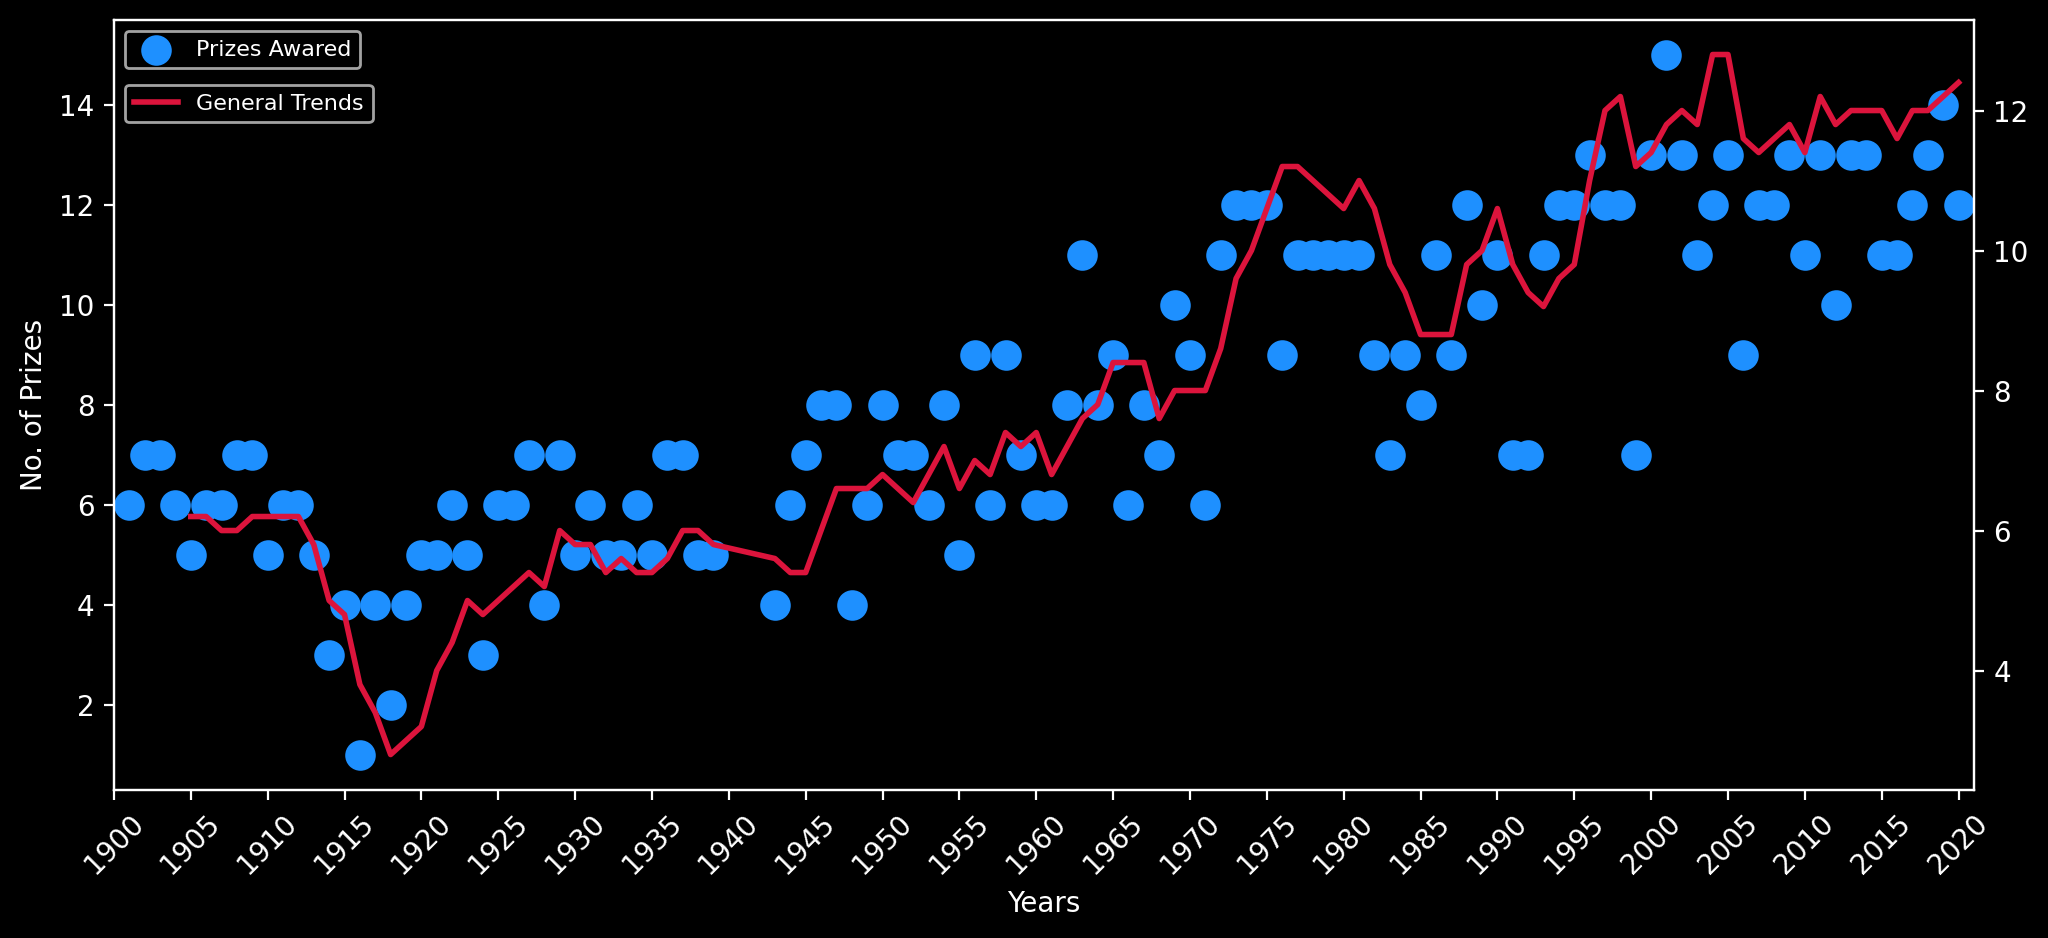

In [17]:
prize_per_year = df_data.groupby(by="year").count().prize
prize_moving_avg = prize_per_year.rolling(window=5).mean()

plt.figure(figsize=(12, 5), dpi=200)

plt.xticks(np.arange(1900, 2021, step=5), rotation=45)
plt.xlabel("Years")
plt.ylabel("No. of Prizes")

axis1 = plt.gca()  # Gets Current Axis
axis2 = axis1.twinx()  # Copy Y-axis

axis1.set_xlim(1900, 2021)


axis1.scatter(
    x=prize_per_year.index,
    y=prize_per_year.values,
    c="dodgerblue",
    alpha=1,
    s=100,
    label="Prizes Awared",
)

axis2.plot(
    prize_per_year.index,
    prize_moving_avg.values,
    color="crimson",
    linewidth=2,
    label="General Trends",
)

axis1.legend(
    loc="upper left",
    bbox_to_anchor=(0, 1),
    fontsize=8,
)
axis2.legend(
    loc="upper left",
    bbox_to_anchor=(0, 0.93),
    fontsize=8,
)

plt.show()

#### The Prize Share of Laureates over Time


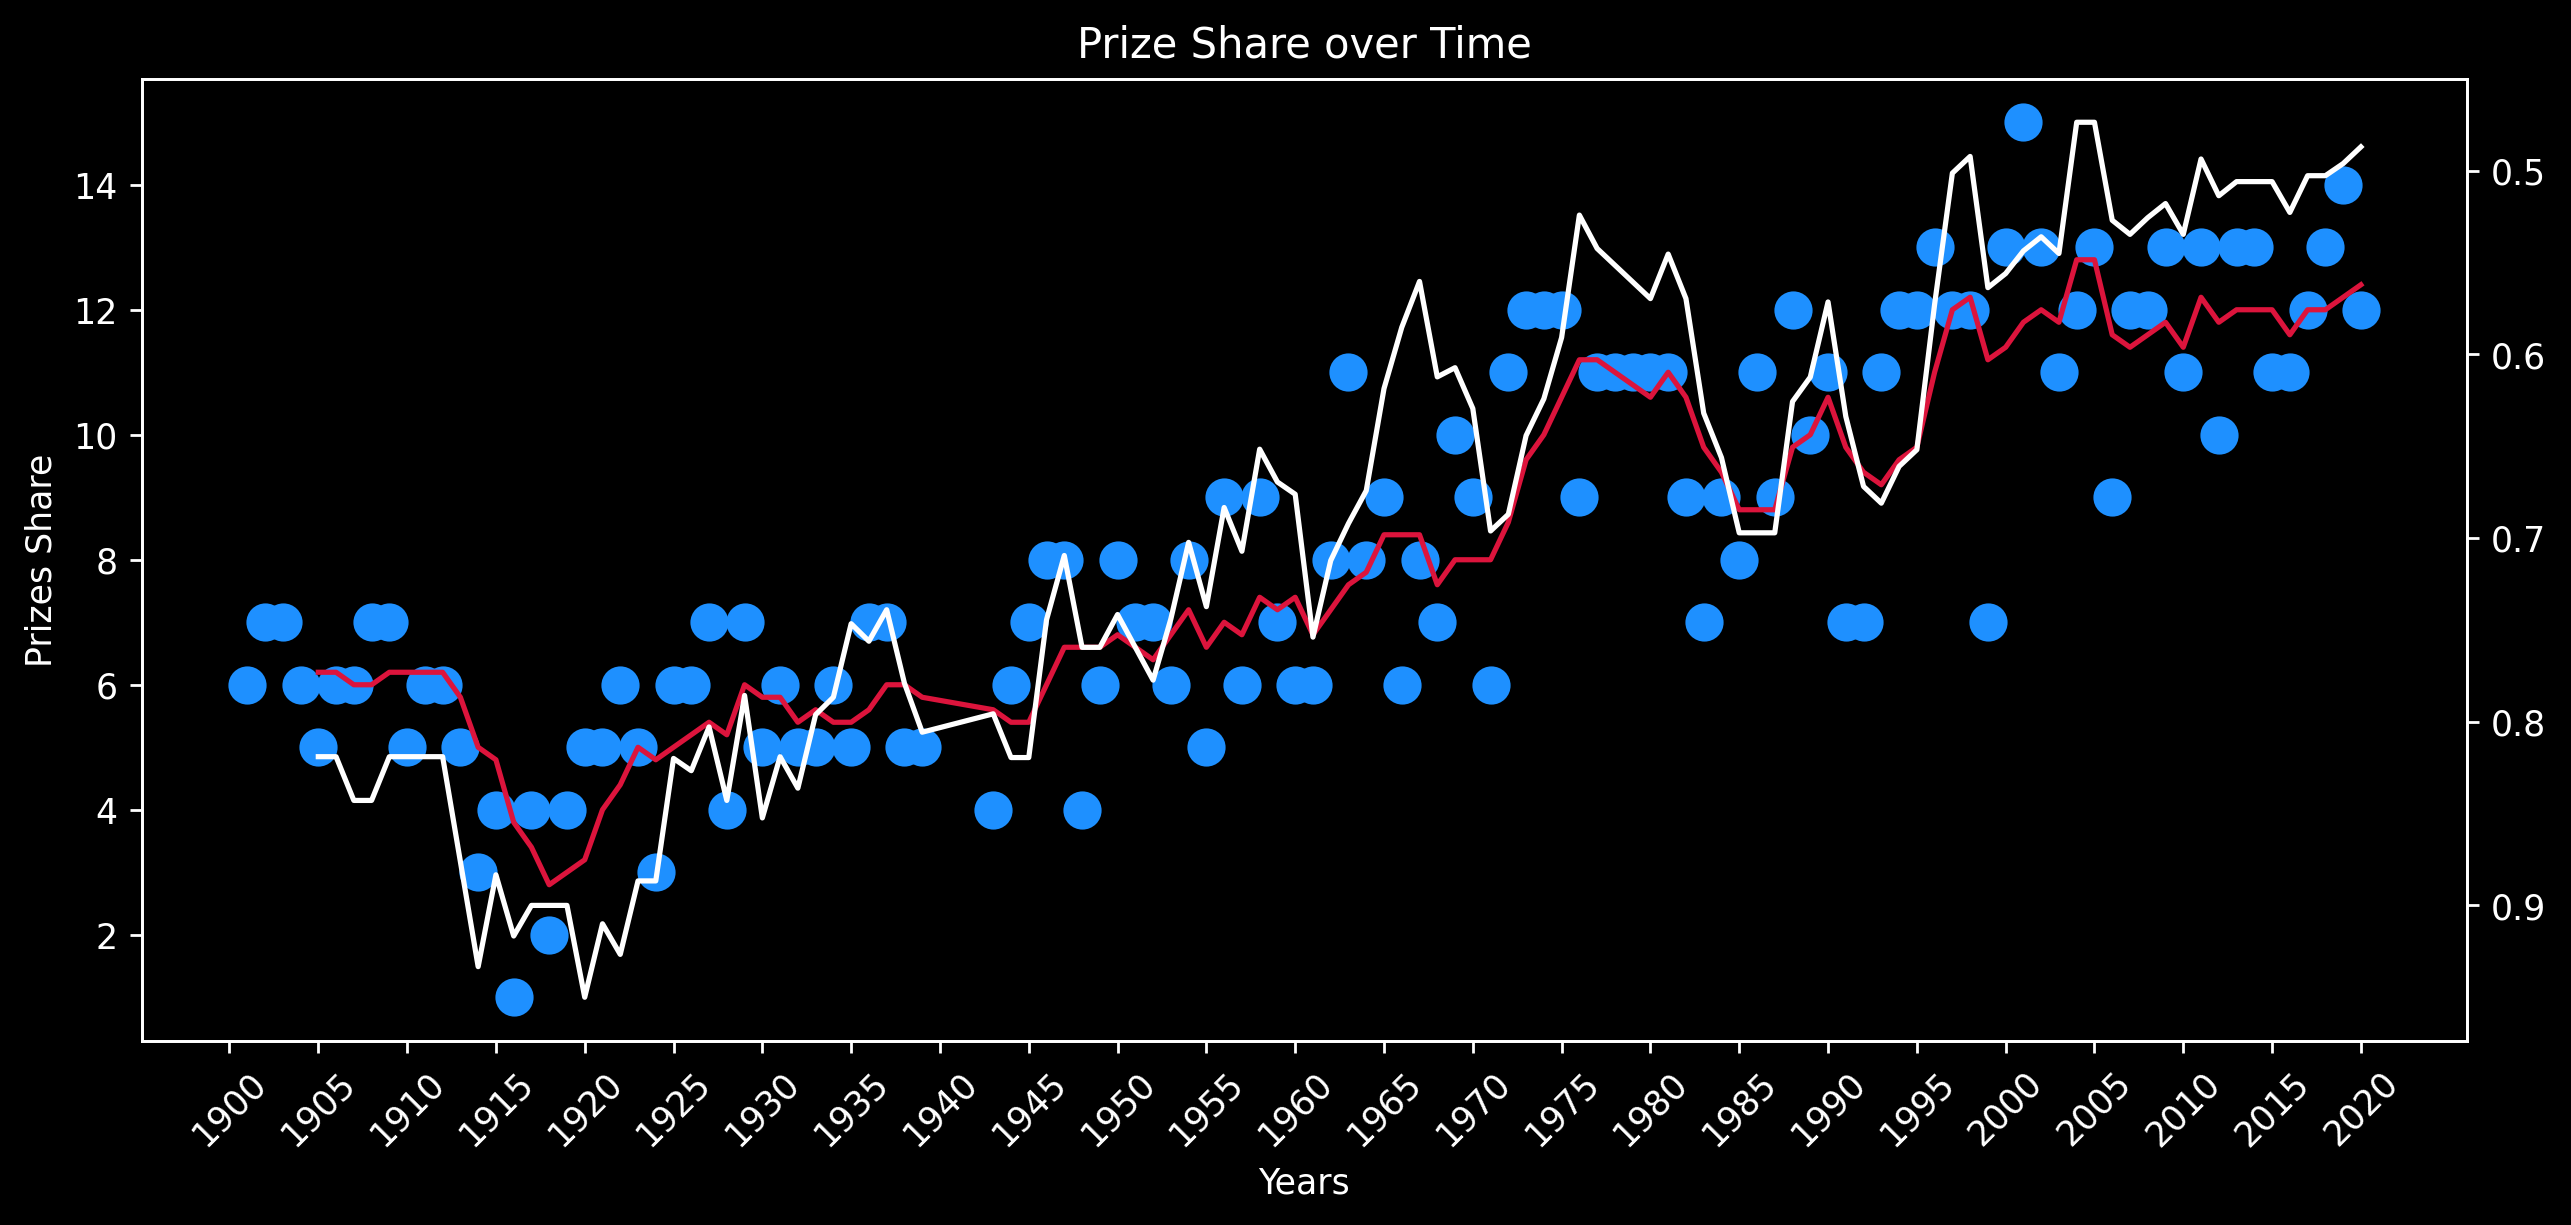

In [18]:
prize_share_over_years = df_data.groupby(by="year").agg(
    func={"share_pct": pd.Series.mean}
)

prize_share_moving_window = prize_share_over_years.rolling(window=5).mean()


# Setting up Figure:s
plt.figure(figsize=(12, 5), dpi=250)
plt.title("Prize Share over Time")
plt.xlabel("Years")
plt.ylabel("Prizes Share")
plt.xticks(np.arange(1900, 2021, step=5), rotation=45)

axis1 = plt.gca()
axis2 = axis1.twinx()

axis1.scatter(
    x=prize_per_year.index,
    y=prize_per_year.values,
    c="dodgerblue",
    alpha=1,
    s=100,
)

axis1.plot(
    prize_per_year.index,
    prize_moving_avg.values,
    color="crimson",
    linewidth=1.5,
)

axis2.invert_yaxis()

axis2.plot(
    prize_per_year.index,
    prize_share_moving_window.values,
    color="white",
    linewidth=1.5,
)

plt.show()

## Top 20 Countries


### Making the Plotly Bar Chart for the Representation


In [19]:
top_20_countries = df_data["birth_country_current"].value_counts()
top_20_countries = top_20_countries.reset_index()
top_20_countries.head()

# Setting Coordinates:
DF = top_20_countries[:19]
XCOR = "count"
YCOR = "birth_country_current"

# Setting Labels:
TITLE = "Nobel Winning Countries"
XLABEL = "No.Prizes"
YLABEL = "Countries"

# Plotting Graph
bar = px.bar(
    data_frame=DF,
    x=XCOR,
    y=YCOR,
    color=XCOR,
    color_continuous_scale=px.colors.sequential.Bluered,
)

# Updating layout:
bar.update_layout(
    xaxis_title=XLABEL,
    yaxis_title=YLABEL,
    coloraxis_colorbar=dict(title="No. of Prizes"),
    yaxis=dict({"categoryorder": "total ascending"}),
)

bar.show()

### Choropleth Map


In [20]:
world_map_df = df_data.groupby("ISO").agg(
    {"prize": pd.Series.count},
)

world_map_df.head()

map = px.choropleth(
    data_frame=world_map_df,
    locations=world_map_df.index,
    hover_data="prize",
    color="prize",
    title="Distribution of Nobel in World",
    color_continuous_scale=px.colors.sequential.Agsunset_r,
)

map.update_layout(
    width=1150,
    height=500,
    coloraxis_colorbar=dict(title="Prizes"),
)

map.show()

### Country Bar Chart with Prize Category


In [21]:
country_category_df = df_data.groupby(
    ["birth_country_current", "category"], as_index=False
).agg({"prize": pd.Series.count})

# Merging the DataFrame:
merged_df = pd.merge(country_category_df, top_20_countries, on="birth_country_current")
merged_df.columns = ["birth_country_current", "category", "cat_prize", "total_prize"]
merged_df.sort_values(by="total_prize", ascending=False, inplace=True)


# Setting Coordinates:
DF = merged_df[:80]
XCOR = "cat_prize"
YCOR = "birth_country_current"

# Setting Labels:
TITLE = "Countries & Cateogry wise Distribution of Prizes"
XLABEL = "No. Prizes"
YLABEL = "Countries"


bar = px.bar(
    data_frame=DF,
    x=XCOR,
    y=YCOR,
    color="category",
    title=TITLE,
)
bar.update_layout(
    xaxis_title=XLABEL,
    yaxis_title=YLABEL,
    yaxis=dict({"categoryorder": "total ascending"}),
    legend_title_text="Categories",
)

bar.show()

## Country Prizes over Time


In [22]:
prize_BY_year = df_data.groupby(
    ["birth_country_current", "year"], as_index=False
).count()

prize_BY_year = prize_BY_year.sort_values("year")[
    ["year", "birth_country_current", "prize"]
]
prize_BY_year.head()
cumulative_prize = (
    prize_BY_year.groupby(["birth_country_current", "year"])
    .sum()
    .groupby(level=[0])
    .cumsum()
)

cumulative_prize.reset_index(inplace=True)

### Making Line Chart


In [23]:
line_chart = px.line(
    cumulative_prize,
    x="year",
    y="prize",
    color="birth_country_current",
    hover_name="birth_country_current",
)

line_chart.update_layout(
    xaxis_title="Year",
    yaxis_title="No. of Prizes",
)

line_chart.show()

## The Top Research Organisations


In [24]:
top_research_org = df_data["organization_name"].value_counts()[:19]

# Setting Coordinates:
DF = top_research_org
XCOR = top_research_org.values
YCOR = top_research_org.index

# Setting Labels:
TITLE = "Top Research Organizations"
XLABEL = "No. Prizes"
YLABEL = "Organizations Name"

bar = px.bar(
    data_frame=DF,
    title=TITLE,
    x=XCOR,
    y=YCOR,
    color=XCOR,
    color_continuous_scale=px.colors.sequential.Agsunset_r,
)

bar.update_layout(
    xaxis_title=XLABEL,
    yaxis_title=YLABEL,
    coloraxis_colorbar=dict(title="No. Prizes"),
    yaxis=dict({"categoryorder": "total ascending"}),
)

bar.show()

### Top 20 cities


In [25]:
top_20_cities = df_data["organization_city"].value_counts()[:19]

# Setting Coordinates:
XCOR = top_20_cities.values
YCOR = top_20_cities.index

# Setting Labels:
TITLE = "Top 20 Cities"
XLABEL = "No. Prizes"
YLABEL = "City Names"

# Plotting Graphs:
bar = px.bar(
    data_frame=top_20_cities,
    title=TITLE,
    x=XCOR,
    y=YCOR,
    color=XCOR,
    color_continuous_scale=px.colors.sequential.Plasma_r,
)

# Updating Layout:
bar.update_layout(
    xaxis_title=XLABEL,
    yaxis_title=YLABEL,
    yaxis=dict({"categoryorder": "total ascending"}),
)

bar.show()

### Top Laureate Birth Cities


In [26]:
birth_cities = df_data["birth_city"].value_counts()[:19]

# Setting Coordinates:
XCOR = birth_cities.values
YCOR = birth_cities.index

# Setting Labels:
TITLE = "Laureates Birth Cities"
XLABEL = "No. of Prizes"
YLABEL = "Cities Name"

# Plotting Graphs:
bar = px.bar(
    data_frame=birth_cities,
    title=TITLE,
    x=XCOR,
    y=YCOR,
    color=XCOR,
    color_continuous_scale=px.colors.sequential.Blugrn,
)

# Updating Layout:
bar.update_layout(
    xaxis_title=XLABEL,
    yaxis_title=YLABEL,
    coloraxis_colorbar=dict(title="No.of Prize"),
    yaxis=dict({"categoryorder": "total ascending"}),
)

bar.show()

## SunBurst Chart


In [27]:
country_city_org = df_data.groupby(
    ["organization_country", "organization_city", "organization_name"],
    as_index=False,
).agg({"prize": pd.Series.count})

country_city_org = country_city_org.sort_values("prize", ascending=False)

# Setting Coordinates:
PATH = ["organization_country", "organization_city", "organization_name"]
VALUES = "prize"
DF = country_city_org


sun = px.sunburst(
    data_frame=DF,
    path=PATH,
    values=VALUES,
)


sun.show()

## Winning Ages of Noble Laureates


In [28]:
year = df_data.birth_date.dt.year
winning_age = df_data.year - year

df_data["winning_age"] = winning_age

#### Histogram Representation


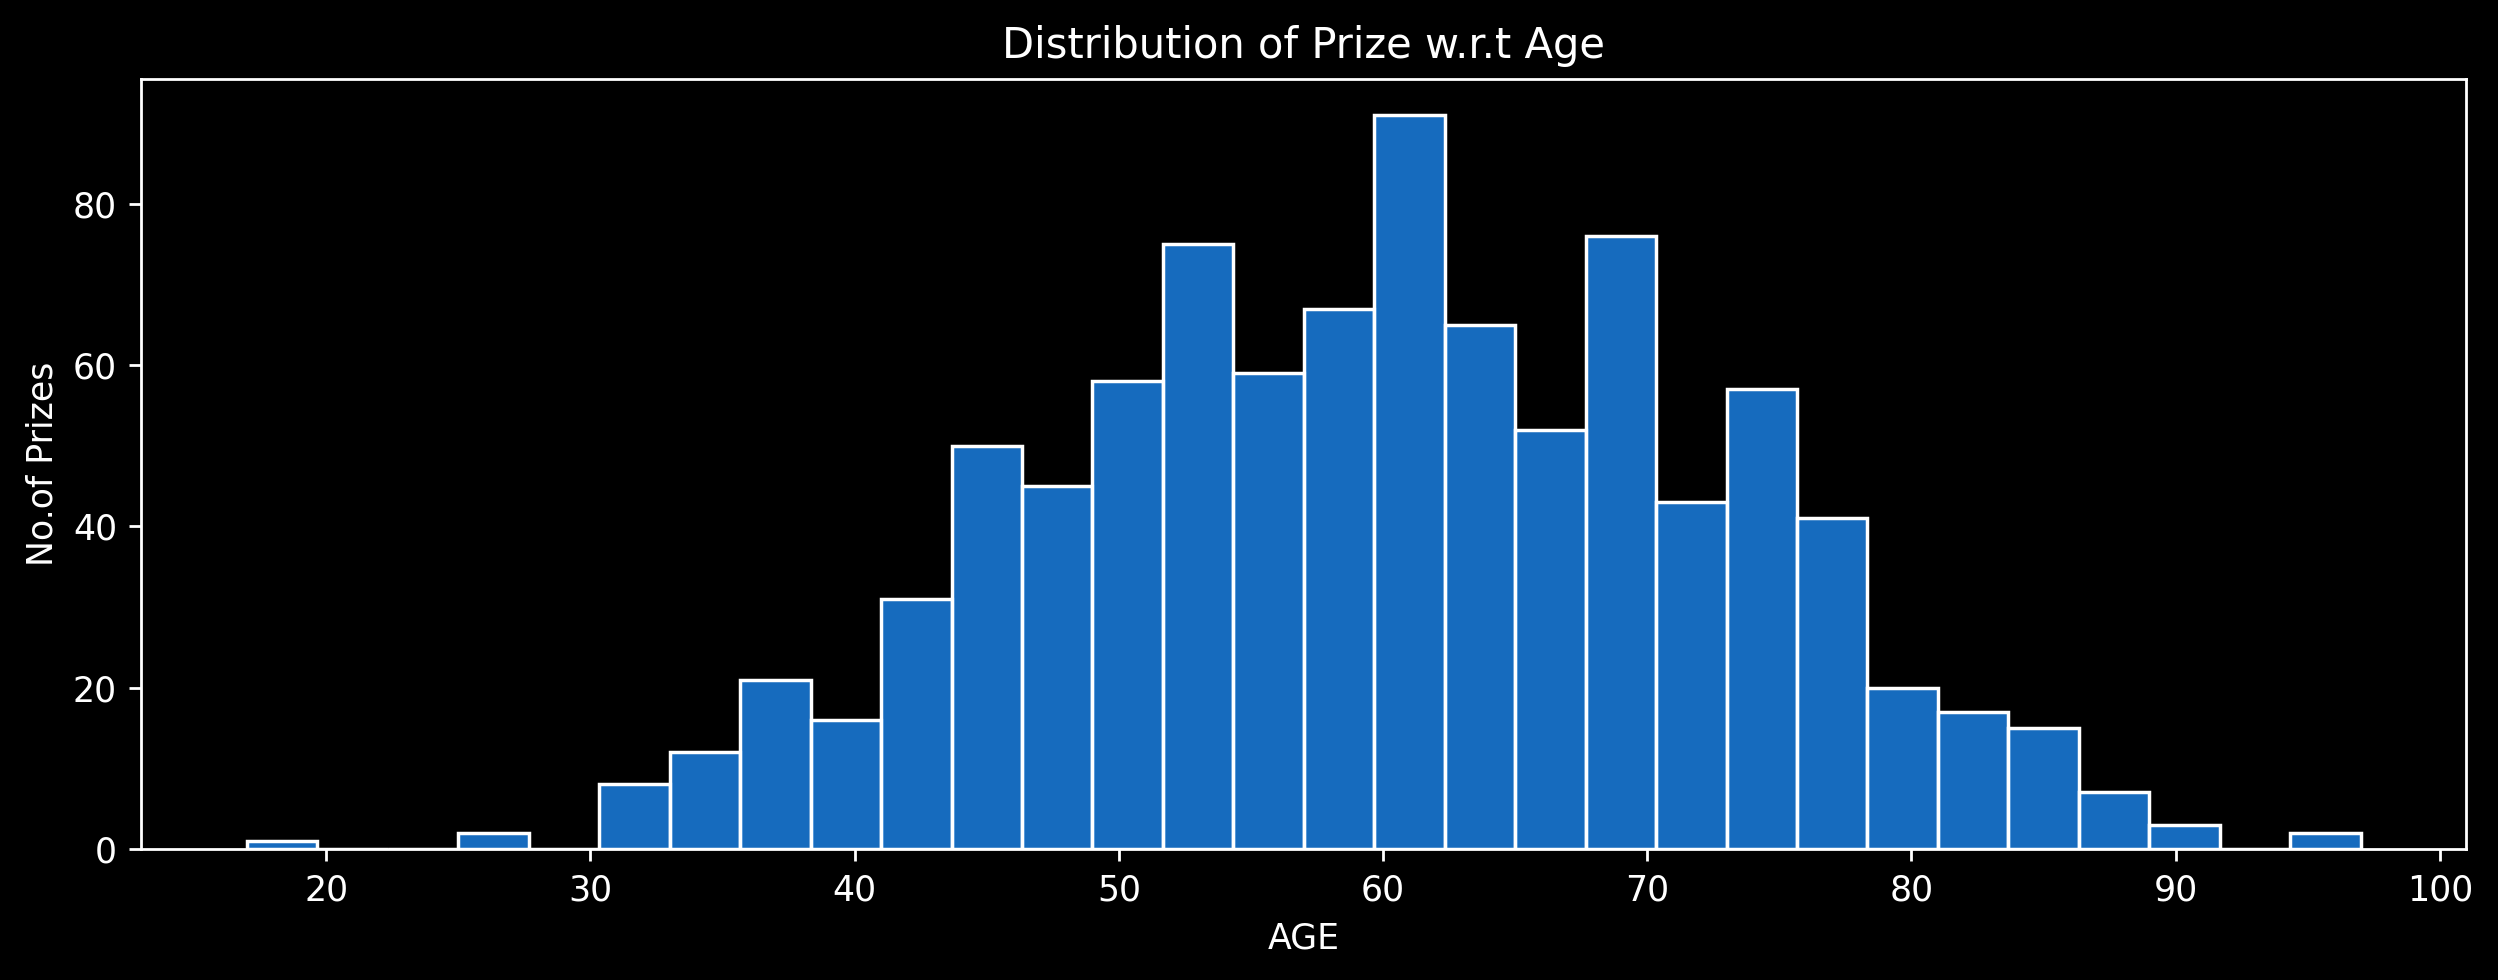

In [29]:
plt.figure(figsize=(12, 4), dpi=250)

plt.title("Distribution of Prize w.r.t Age")
plt.xlabel("AGE")
plt.ylabel("No.of Prizes")

sns.histplot(
    data=df_data,
    x="winning_age",
    color="dodgerblue",
    bins=30,
)


plt.show()

### General Trends Related to Winning Ages:


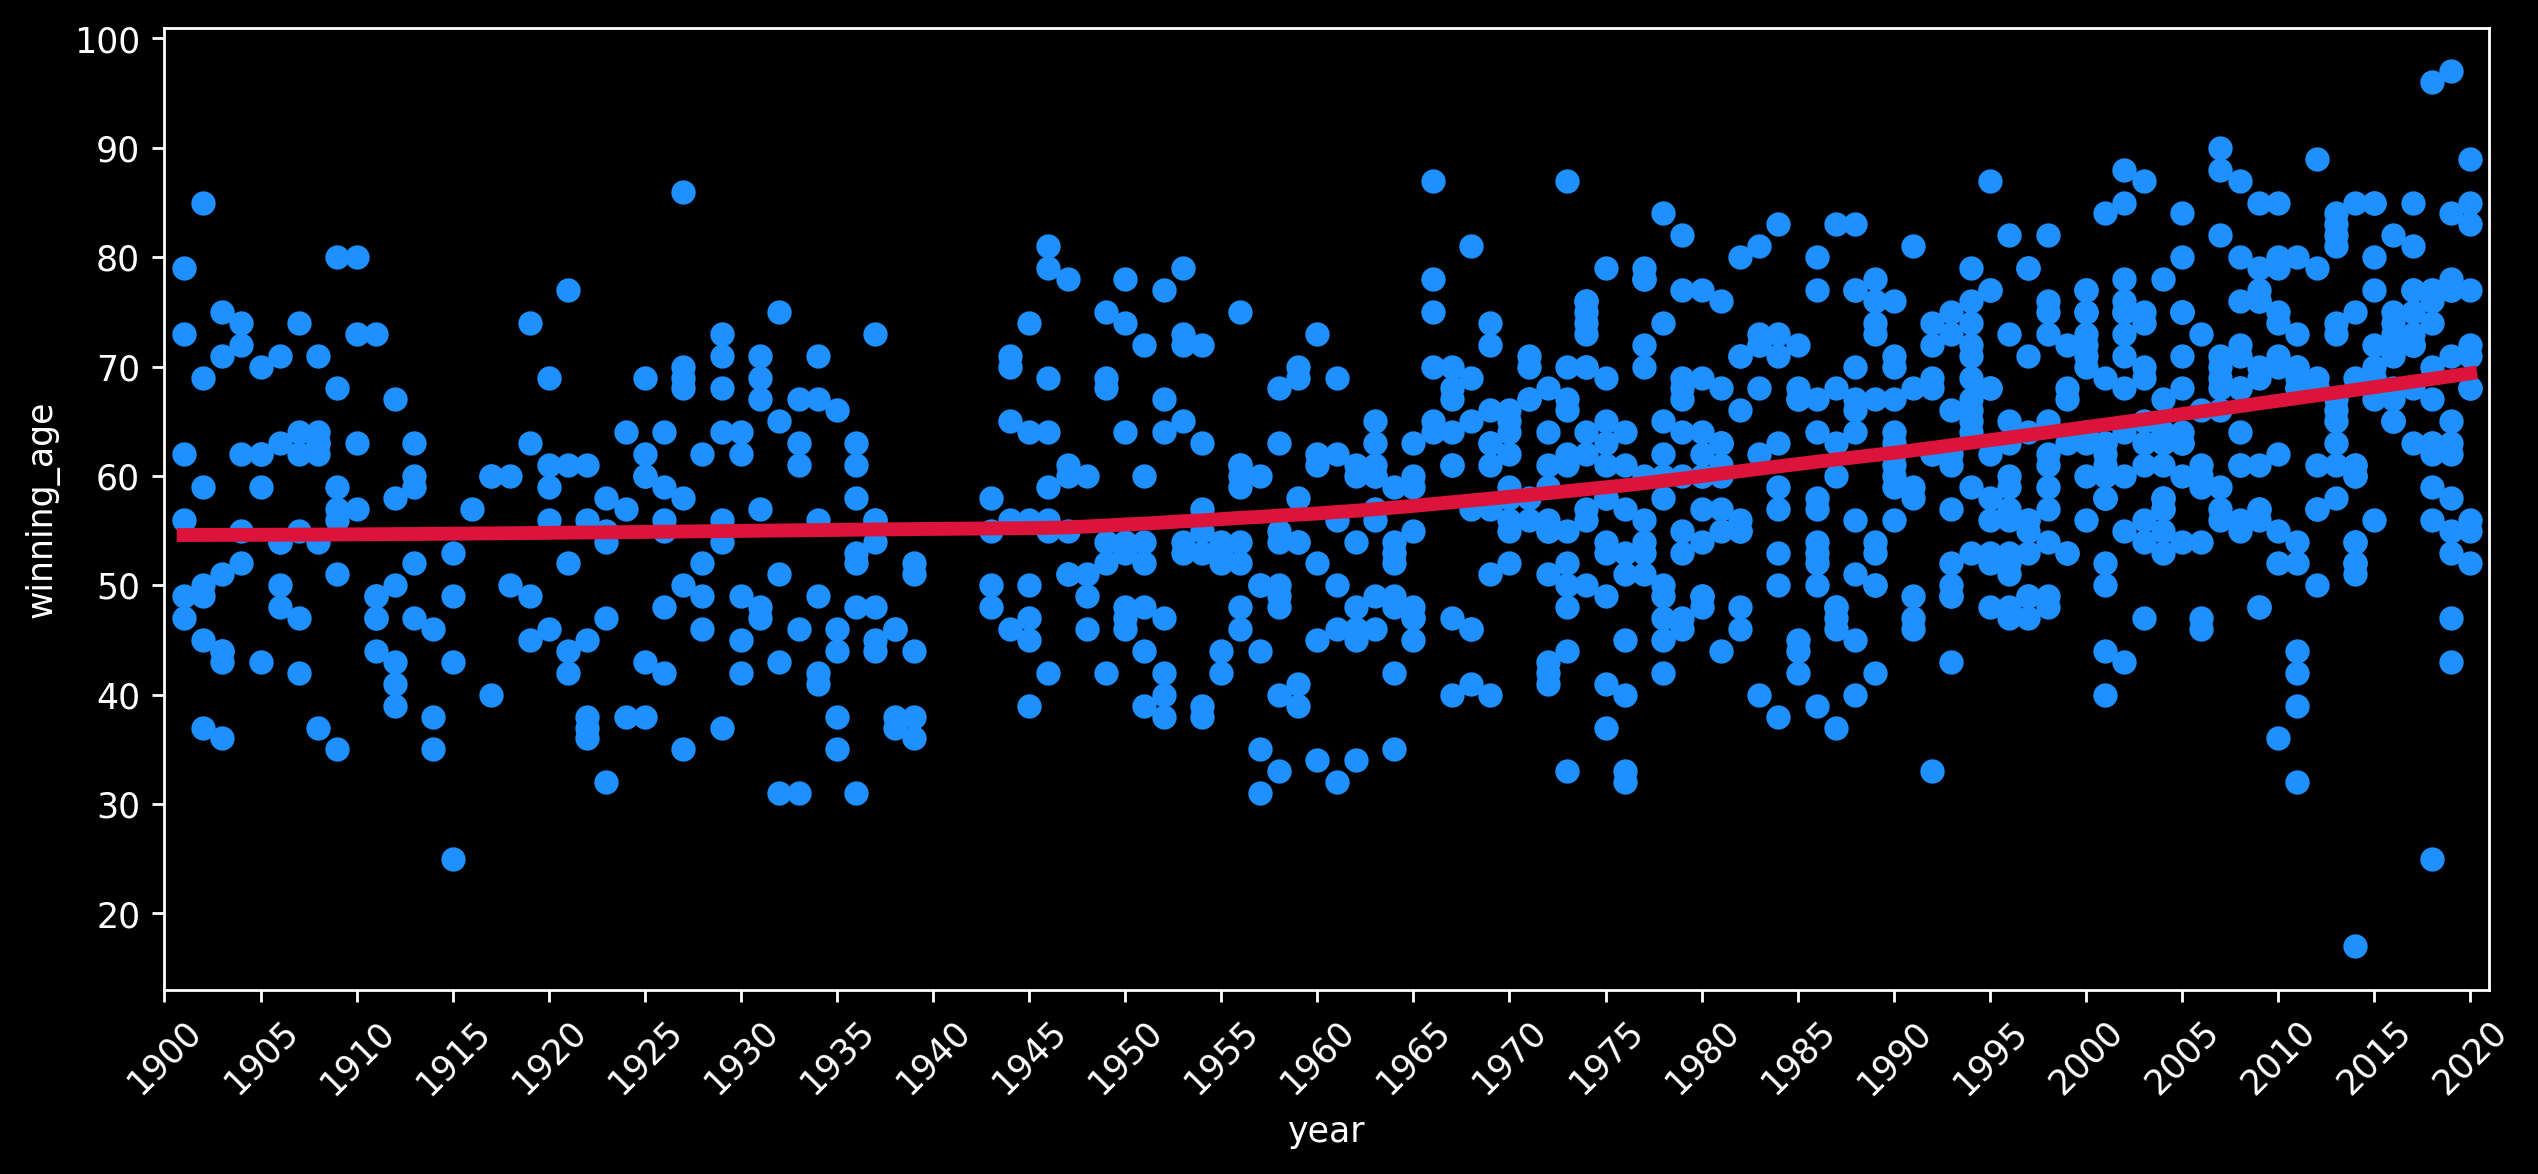

In [30]:
plt.figure(figsize=(12, 5), dpi=250)

plt.xticks(
    np.arange(1900, 2021, step=5),
    rotation=45,
)
plt.xlim(1900, 2021)

sns.regplot(
    data=df_data,
    x="year",
    y="winning_age",
    lowess=True,
    scatter_kws={"alpha": 1, "color": "dodgerblue"},
    line_kws={"linewidth": 4, "color": "crimson"},
)


plt.show()

### Box Plotting between the ages and categories


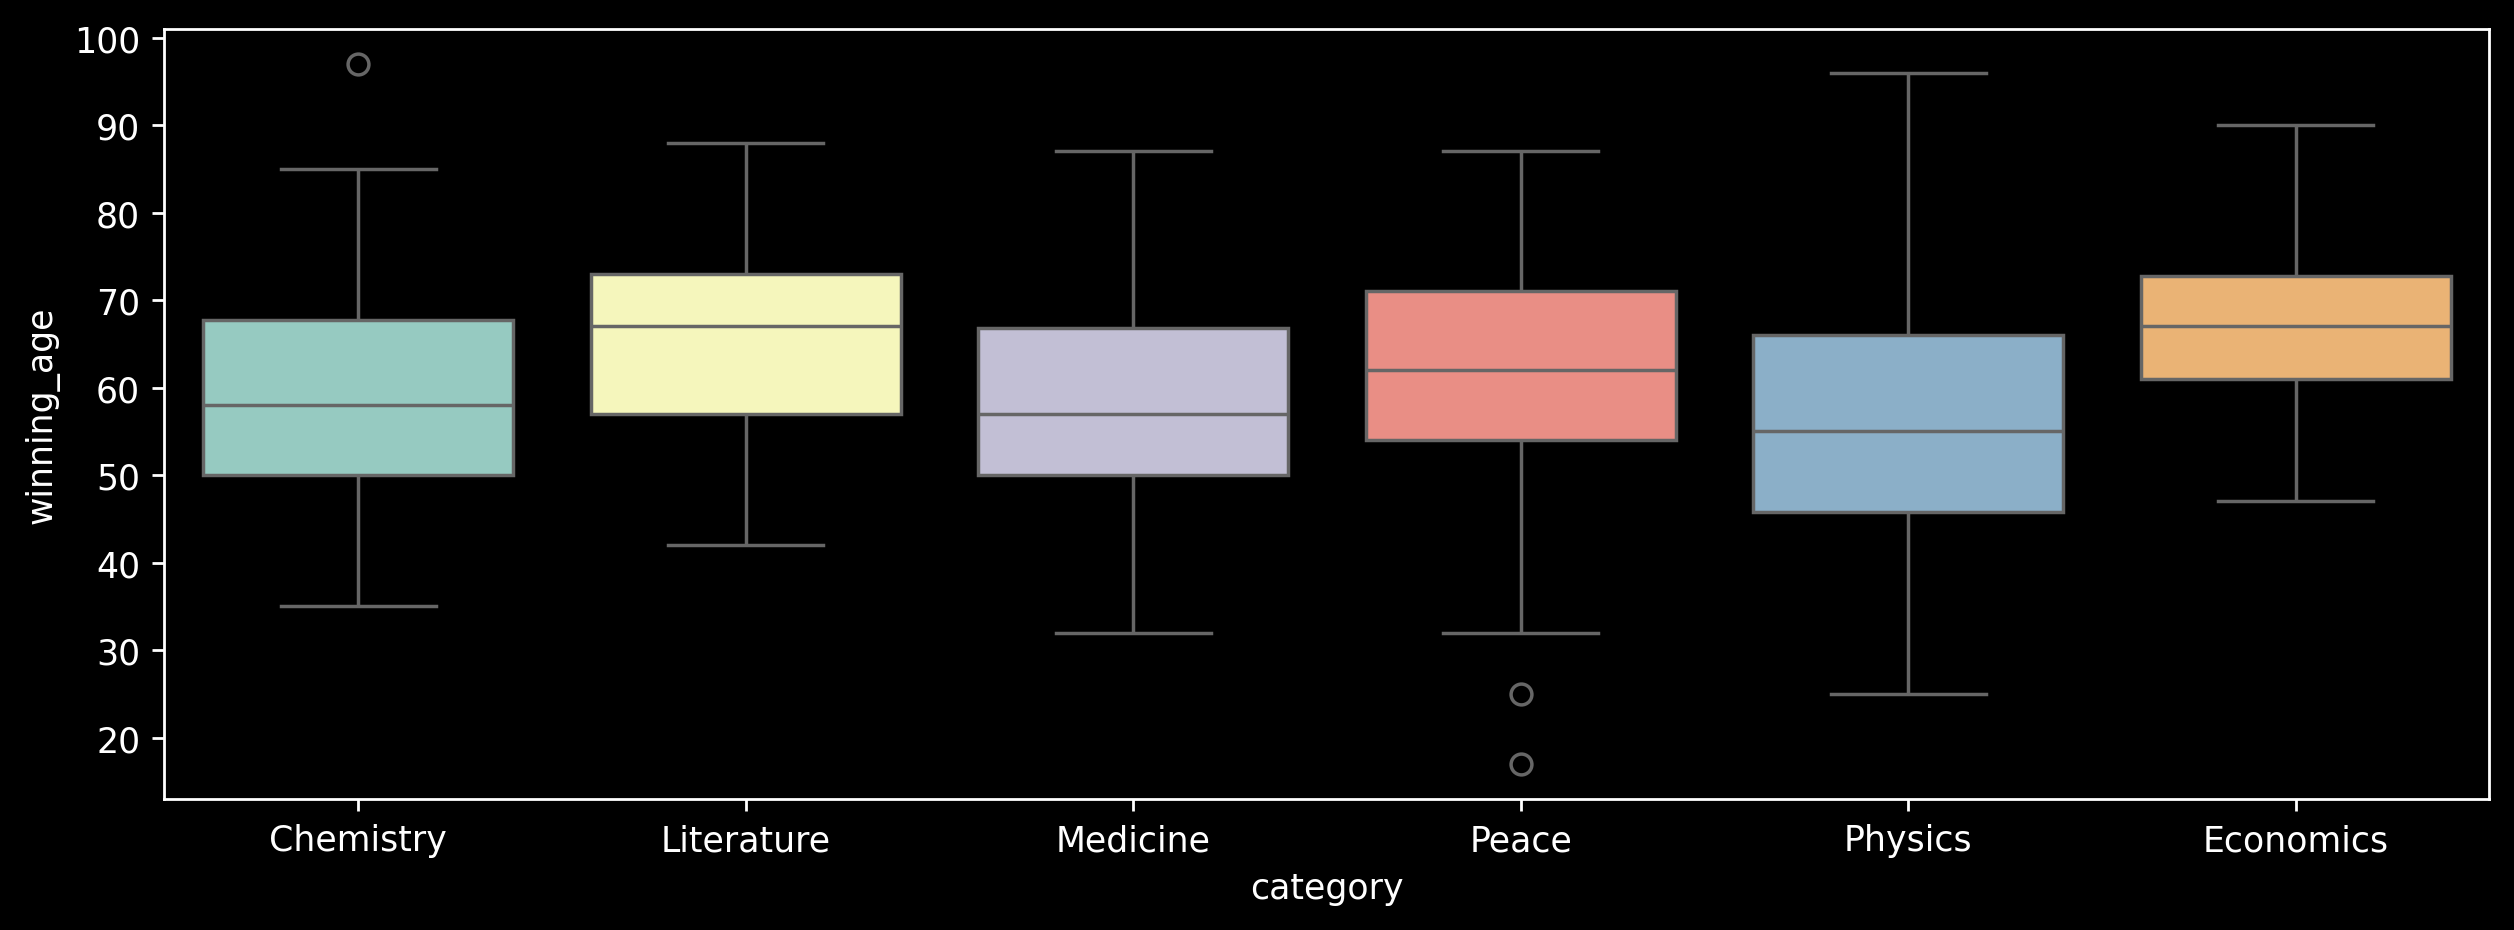

In [31]:
plt.figure(figsize=(12, 4), dpi=250)
sns.boxplot(
    data=df_data,
    x="category",
    y="winning_age",
    hue="category",
)

plt.show()

<Figure size 6000x2000 with 0 Axes>

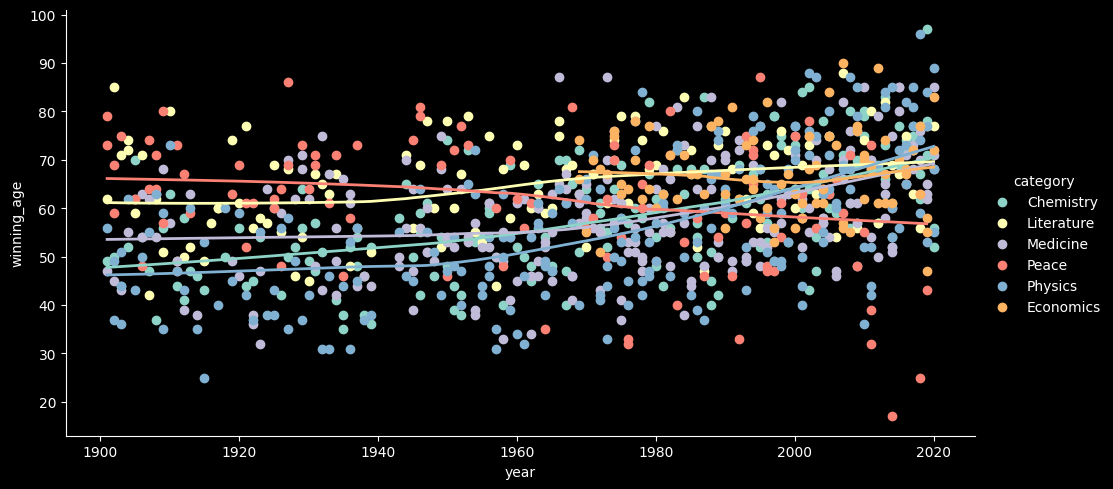

In [39]:
plt.figure(figsize=(12, 4), dpi=500)
sns.lmplot(
    data=df_data,
    x="year",
    y="winning_age",
    hue="category",
    lowess=True,
    aspect=2,
    scatter_kws={"alpha": 1},
    line_kws={"linewidth": 2},
)

plt.show()